## O Danych

Zbiór danych zawiera informacje o polskich wyborach do Europarlamentu.

Każdy wiersz w zbiorze danych reprezentuje daną partię polityczną


Kolumny:
* **ROK** - Rok wyborów
* **PARTIA** - Partia
* **SKROT** - Skrót partii w/w
* **POGLAGY** - Poglądy partii według kategorii: Prawica, Centroprawica, Centrum, Centrolewica, Lewica
* **GLOSY** - Ile procent głosów otrzymała dana partia
* **MANDATY** - Ilość mandatów w Europarlamencie 

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Ogólny przegląd danych

In [86]:
df = pd.read_csv('Europarlament.csv', sep=';', encoding='iso-8859-2', engine='python')
df = df.applymap(lambda x: x.replace('\x9c', 'ś') if isinstance(x, str) else x)
df

,ROK,PARTIA,SKROT,POGLADY,GLOSY,MANDATY
0,2004,Platforma Obywatelska,PO,Centroprawica,"24,10%",15
1,2004,Liga Polskich Rodzin,LPR,Prawica,"15,92%",10
2,2004,Prawo i Sprawiedliwość,PIS,Prawica,"12,67%",7
3,2004,Samoobrona,NaN,Lewica,"10,78%",6
4,2004,Sojusz Lewicy Demokratycznej - Unia Pracy,SLD-UP,Lewica,"9,35%",5
...,...,...,...,...,...,...
60,2024,PolEXIT,PolEXIT,Prawica,"0,25%",Nie
61,2024,Normalny Kraj,NaN,Prawica,"0,17%",Nie
62,2024,Polska Liberalna Strajk Przedsiębiorców,NaN,Prawica,"0,08%",Nie
63,2024,Ruch Naprawy Polski,RNP,Prawica,"0,04%",Nie


#### Widzimy że plik został wczytany, ale bez polskich znaków, zaraz to zmienię

In [87]:
df = df.replace({
    'ě': 'ż',
    '÷': 'ł',
    '': 'ś',
    '': 'ę',
    '': 'ś',
    'Ž': 'ż',
    '': 'ń',
    'ô': 'ó',
    '': 'ó',
    'ô': 'ę',
}, regex=True)
df

,ROK,PARTIA,SKROT,POGLADY,GLOSY,MANDATY
0,2004,Platforma Obywatelska,PO,Centroprawica,"24,10%",15
1,2004,Liga Polskich Rodzin,LPR,Prawica,"15,92%",10
2,2004,Prawo i Sprawiedliwość,PIS,Prawica,"12,67%",7
3,2004,Samoobrona,NaN,Lewica,"10,78%",6
4,2004,Sojusz Lewicy Demokratycznej - Unia Pracy,SLD-UP,Lewica,"9,35%",5
...,...,...,...,...,...,...
60,2024,PolEXIT,PolEXIT,Prawica,"0,25%",Nie
61,2024,Normalny Kraj,NaN,Prawica,"0,17%",Nie
62,2024,Polska Liberalna Strajk Przedsiębiorców,NaN,Prawica,"0,08%",Nie
63,2024,Ruch Naprawy Polski,RNP,Prawica,"0,04%",Nie


In [88]:
df.loc[df['PARTIA'] == 'Prawo i Sprawiedliwo', 'PARTIA'] = 'Prawo i Sprawiedliwość'

### 5 losowych wartości

In [89]:
df. sample (5)

,ROK,PARTIA,SKROT,POGLADY,GLOSY,MANDATY
50,2019,Lewica Razem,NaN,Lewica,"1,24%",Nie
5,2004,Unia Wolności,UW,Centrum,"7,33%",4
53,2019,Jedność Narodu,NaN,Prawica,"0,02%",Nie
36,2014,Nowa Prawica,NP.,Prawica,"7,15%",4
40,2014,Polska Razem,NaN,Prawica,"3,16%",Nie


### 5 pierwszych wartości

In [90]:
df. head (5)

,ROK,PARTIA,SKROT,POGLADY,GLOSY,MANDATY
0,2004,Platforma Obywatelska,PO,Centroprawica,"24,10%",15
1,2004,Liga Polskich Rodzin,LPR,Prawica,"15,92%",10
2,2004,Prawo i Sprawiedliwość,PIS,Prawica,"12,67%",7
3,2004,Samoobrona,NaN,Lewica,"10,78%",6
4,2004,Sojusz Lewicy Demokratycznej - Unia Pracy,SLD-UP,Lewica,"9,35%",5


### 5 ostatnich wartości

In [91]:
df.tail(5)

,ROK,PARTIA,SKROT,POGLADY,GLOSY,MANDATY
60,2024,PolEXIT,PolEXIT,Prawica,"0,25%",Nie
61,2024,Normalny Kraj,NaN,Prawica,"0,17%",Nie
62,2024,Polska Liberalna Strajk Przedsiębiorców,NaN,Prawica,"0,08%",Nie
63,2024,Ruch Naprawy Polski,RNP,Prawica,"0,04%",Nie
64,2024,Głos Silnej Polski,NaN,Prawica,"0,02%",Nie


### Aby potem było prościej w pokazywaniu wykresów, rozbiję kolumnę MANDATY na MANDATY TAK NIE i MANDATY ILOSC, a także GLOSY zamienię procenty na lczby i nazwę tę kolumnę GLOSY (%).

In [92]:
df['GLOSY (%)'] = df['GLOSY'].str.replace(',', '.').str.replace('%', '').astype(float)

In [93]:
# Kopia oryginalnej kolumny
df['MANDATY ILOSC'] = df['MANDATY'].copy()

# Dodaję kolumnę logiczną: Czy partia była w Sejmie?
df['MANDATY TAK NIE'] = df['MANDATY'].apply(lambda x: x != 'Nie' and pd.notnull(x))
df

,ROK,PARTIA,SKROT,POGLADY,GLOSY,MANDATY,GLOSY (%),MANDATY ILOSC,MANDATY TAK NIE
0,2004,Platforma Obywatelska,PO,Centroprawica,"24,10%",15,24.10,15,True
1,2004,Liga Polskich Rodzin,LPR,Prawica,"15,92%",10,15.92,10,True
2,2004,Prawo i Sprawiedliwość,PIS,Prawica,"12,67%",7,12.67,7,True
3,2004,Samoobrona,NaN,Lewica,"10,78%",6,10.78,6,True
4,2004,Sojusz Lewicy Demokratycznej - Unia Pracy,SLD-UP,Lewica,"9,35%",5,9.35,5,True
...,...,...,...,...,...,...,...,...,...
60,2024,PolEXIT,PolEXIT,Prawica,"0,25%",Nie,0.25,Nie,False
61,2024,Normalny Kraj,NaN,Prawica,"0,17%",Nie,0.17,Nie,False
62,2024,Polska Liberalna Strajk Przedsiębiorców,NaN,Prawica,"0,08%",Nie,0.08,Nie,False
63,2024,Ruch Naprawy Polski,RNP,Prawica,"0,04%",Nie,0.04,Nie,False


### Kolumny GLOSY i MANDATY są nie potrzebne więc je usuwamy i zmienimy kolejność kolumn

In [94]:
df = df.drop(columns=['GLOSY', 'MANDATY'])

In [95]:
# Zmieńmy kolejność kolumn
df = df[['ROK','PARTIA','SKROT', 'POGLADY', 'GLOSY (%)', 'MANDATY TAK NIE', 'MANDATY ILOSC']]

# Jeśłi kolumna SKROT jest pusta do zostawmy "-"
df['SKROT'] = df['SKROT'].fillna('-')

# Zamieńmy w kolumnie II_TURA_TAK_NIE True na Tak, a False na Nie
df['MANDATY TAK NIE'] = df['MANDATY TAK NIE'].map({True: 'Tak', False: 'Nie'})
df

,ROK,PARTIA,SKROT,POGLADY,GLOSY (%),MANDATY TAK NIE,MANDATY ILOSC
0,2004,Platforma Obywatelska,PO,Centroprawica,24.10,Tak,15
1,2004,Liga Polskich Rodzin,LPR,Prawica,15.92,Tak,10
2,2004,Prawo i Sprawiedliwość,PIS,Prawica,12.67,Tak,7
3,2004,Samoobrona,-,Lewica,10.78,Tak,6
4,2004,Sojusz Lewicy Demokratycznej - Unia Pracy,SLD-UP,Lewica,9.35,Tak,5
...,...,...,...,...,...,...,...
60,2024,PolEXIT,PolEXIT,Prawica,0.25,Nie,Nie
61,2024,Normalny Kraj,-,Prawica,0.17,Nie,Nie
62,2024,Polska Liberalna Strajk Przedsiębiorców,-,Prawica,0.08,Nie,Nie
63,2024,Ruch Naprawy Polski,RNP,Prawica,0.04,Nie,Nie


### Przyjrzyjmy się ogólnym informacjom o Date Frame

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ROK              65 non-null     int64  
 1   PARTIA           65 non-null     object 
 2   SKROT            65 non-null     object 
 3   POGLADY          65 non-null     object 
 4   GLOSY (%)        65 non-null     float64
 5   MANDATY TAK NIE  65 non-null     object 
 6   MANDATY ILOSC    65 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.7+ KB


# Analiza brakujących wartości

In [97]:
df.isnull().sum()

ROK                0
PARTIA             0
SKROT              0
POGLADY            0
GLOSY (%)          0
MANDATY TAK NIE    0
MANDATY ILOSC      0
dtype: int64

##### Nie ma brakujących wartości

# Analiza pojedynczych zmiennych

In [98]:
df['ROK'].min(), df['ROK'].max()

(2004, 2024)

##### Pierwszym rokiem badania jest 2004 czyli rok wstąpienia Polski  do Unii Europejskiej, a ostatnim 2024

In [99]:
df['PARTIA'].value_counts(dropna=False).head()

Prawo i Sprawiedliwość                       5
Platforma Obywatelska                        3
Samoobrona                                   3
Sojusz Lewicy Demokratycznej - Unia Pracy    3
Polskie Stronnictwo Ludowe                   3
Name: PARTIA, dtype: int64

##### Najwięcej bo 5 razy Prawo i Sprawiedliwość startowała do Europarlamentu

In [100]:
df['POGLADY'].value_counts(dropna=False)

Prawica          24
Lewica           19
Centrum          14
Centroprawica     6
Centrolewica      2
Name: POGLADY, dtype: int64

##### Najwięcej partii bo aż 24 miało poglądy prawicowe, na drugim miejscu są partie o poglądach lewicowch (19), podium zamykają partie o poglądach centrum (14).

### Przyjrzyjmy się partiom, które dostały się do Europarlamentu.

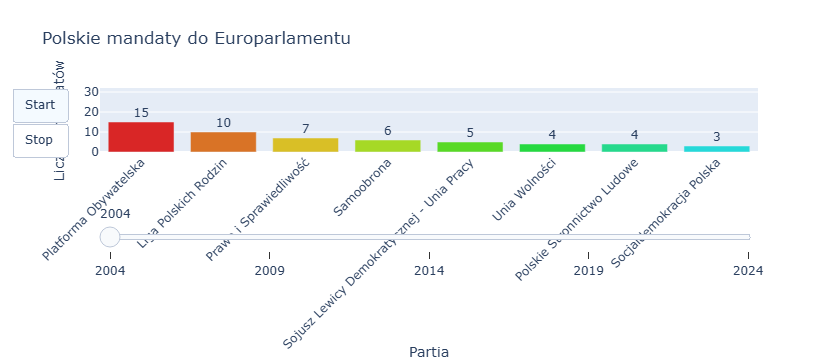

In [101]:
# Filtrowanie partii, które dostały mandaty do Europarlamentu
df_europarlament = df[df["MANDATY TAK NIE"] == "Tak"].copy()
df_europarlament["MANDATY ILOSC"] = pd.to_numeric(df_europarlament["MANDATY ILOSC"], errors='coerce')

years = sorted(df_europarlament["ROK"].unique())
partie = df_europarlament["PARTIA"].unique()

# Kolory partii (spójne we wszystkich latach)
colors = {
    partia: f"hsl({i * 360 / len(partie)}, 70%, 50%)"
    for i, partia in enumerate(partie)
}

# Inicjalizacja figury
fig = go.Figure()
initial_year = years[0]
df_initial = df_europarlament[df_europarlament["ROK"] == initial_year]

fig.add_trace(go.Bar(
    x=df_initial["PARTIA"],
    y=df_initial["MANDATY ILOSC"],
    marker_color=[colors[p] for p in df_initial["PARTIA"]],
    text=df_initial["MANDATY ILOSC"],
    textposition='outside',
    name=str(initial_year)
))

# Ramki animacji i kroki suwaka
frames = []
steps = []

for year in years:
    df_year = df_europarlament[df_europarlament["ROK"] == year]
    partie_year = df_year["PARTIA"].tolist()
    y_values = df_year["MANDATY ILOSC"].tolist()

    frame = go.Frame(
        data=[go.Bar(
            x=partie_year,
            y=y_values,
            marker_color=[colors[p] for p in partie_year],
            text=y_values,
            textposition='outside'
        )],
        name=str(year)
    )
    frames.append(frame)

    steps.append({
        "method": "animate",
        "args": [[str(year)], {
            "mode": "immediate",
            "frame": {"duration": 600, "redraw": True},
            "transition": {"duration": 300}
        }],
        "label": str(year)
    })

fig.frames = frames

# Layout wykresu
fig.update_layout(
    title="Polskie mandaty do Europarlamentu",
    xaxis_title="Partia",
    yaxis_title="Liczba mandatów",
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, df_europarlament["MANDATY ILOSC"].max() + 5]),
    sliders=[{
        "active": 0,
        "pad": {"t": 50},
        "steps": steps
    }],
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {"label": "Start", "method": "animate", "args": [None, {
                "frame": {"duration": 1000, "redraw": True},
                "fromcurrent": True,
                "transition": {"duration": 300}
            }]},
            {"label": "Stop", "method": "animate", "args": [[None], {
                "mode": "immediate",
                "frame": {"duration": 0, "redraw": False},
                "transition": {"duration": 0}
            }]}
        ]
    }],
    showlegend=False
)

fig.show()

### Rekord posiadanych mandatów należy do Prawa i Sprawiedliwości w latach 2019-2024 (27 mandatów). Najmniej mandatów (3) miały: Socjaldemokracja Polska (2004), Polskie Stronnictwo Ludowe (2009), Wiosna (2019), Trzecia Droga i Lewica (2024). Najdłużej w Europarlamencie była partia: Platforma Obywatelska oraz Prawo i Sprawiedliwość bo aż 5 kadencji. W latach 2014-2019 liczba mandatów PO i PIS była równa i wynosiła po 19 mandatów. Najwięcej polskich partii w Europarlamencie było w latach 2004-2009 bo, aż 8. Za to najmniej w latach 2019-2024 bo tylko 3 partie.

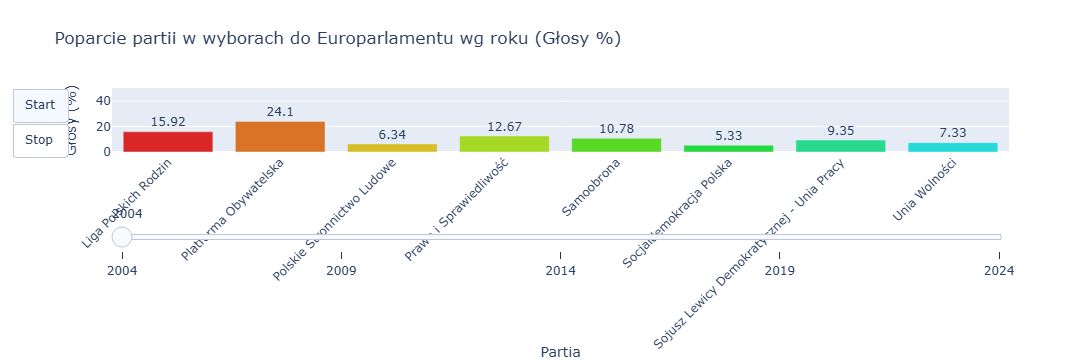

In [102]:
# Filtrowanie partii, które dostały się do Europarlamentu
df_ep = df[df["MANDATY TAK NIE"] == "Tak"].copy()

# Konwersja procentów głosów na float
df_ep["GLOSY (%)"] = pd.to_numeric(df_ep["GLOSY (%)"], errors='coerce')

# Grupowanie (sumowanie poparcia w %, np. jeśli KO i PO osobno)
df_ep = df_ep.groupby(["ROK", "PARTIA"], as_index=False)["GLOSY (%)"].sum()

# Lista unikalnych lat i partii
years = sorted(df_ep["ROK"].unique())
partie = df_ep["PARTIA"].unique()

# Kolory dla partii (przypisane wg indeksu)
colors = {
    partia: f"hsl({i * 360 / len(partie)}, 70%, 50%)"
    for i, partia in enumerate(partie)
}

# Inicjalizacja wykresu
fig = go.Figure()

# Początkowy rok
initial_year = years[0]
df_initial = df_ep[df_ep["ROK"] == initial_year]

fig.add_trace(go.Bar(
    x=df_initial["PARTIA"],
    y=df_initial["GLOSY (%)"],
    marker_color=[colors[p] for p in df_initial["PARTIA"]],
    text=df_initial["GLOSY (%)"].round(2),
    textposition='outside',
    name=str(initial_year)
))

# Ramki animacji i kroki suwaka
frames = []
steps = []

for year in years:
    df_year = df_ep[df_ep["ROK"] == year]
    partie_year = df_year["PARTIA"].tolist()
    y_values = df_year["GLOSY (%)"].round(2).tolist()

    frame = go.Frame(
        data=[go.Bar(
            x=partie_year,
            y=y_values,
            marker_color=[colors[p] for p in partie_year],
            text=y_values,
            textposition='outside'
        )],
        name=str(year)
    )
    frames.append(frame)

    steps.append({
        "method": "animate",
        "args": [[str(year)], {
            "mode": "immediate",
            "frame": {"duration": 500, "redraw": True},
            "transition": {"duration": 300}
        }],
        "label": str(year)
    })

# Dodanie ramek do figury
fig.frames = frames

# Layout
fig.update_layout(
    title="Poparcie partii w wyborach do Europarlamentu wg roku (Głosy %)",
    xaxis_title="Partia",
    yaxis_title="Głosy (%)",
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, df_ep["GLOSY (%)"].max() + 5]),
    sliders=[{
        "active": 0,
        "pad": {"t": 50},
        "steps": steps
    }],
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {"label": "Start", "method": "animate", "args": [None, {
                "frame": {"duration": 1000, "redraw": True},
                "fromcurrent": True,
                "transition": {"duration": 500}
            }]},
            {"label": "Stop", "method": "animate", "args": [[None], {
                "frame": {"duration": 0, "redraw": False},
                "mode": "immediate",
                "transition": {"duration": 0}
            }]}
        ]
    }],
    showlegend=False
)

fig.show()

### Największe poparcie miało Prawo i Sprawiedliwość w roku 2019 (45,38%), a najmniejsze poparcie miał Socjaldemokracja Polska w 2004 roku (5,33%).

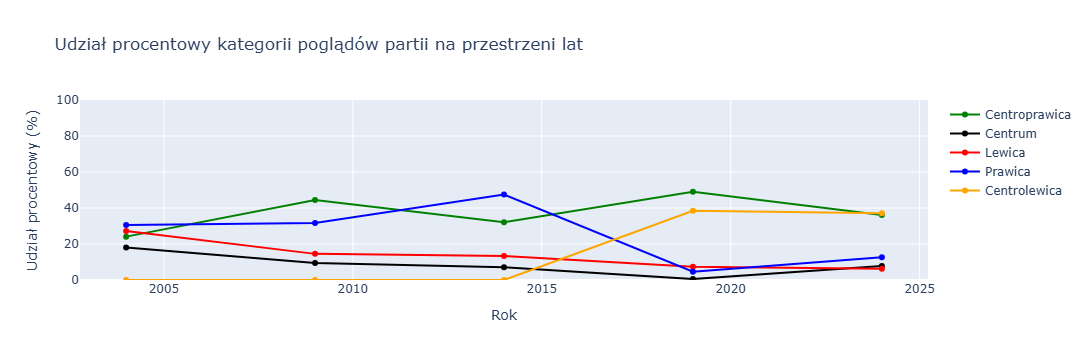

In [103]:
# Konwersja kolumny 'GLOSY (%)' do liczby (float)
df["GLOSY (%)"] = pd.to_numeric(df["GLOSY (%)"], errors='coerce')

# Grupujemy dane: suma procentowego poparcia wg roku i kategorii poglądów
df_grouped = df.groupby(["ROK", "POGLADY"])["GLOSY (%)"].sum().reset_index()

# Suma poparcia w każdym roku (ok. 100%)
rok_sumy = df_grouped.groupby("ROK")["GLOSY (%)"].sum().reset_index().rename(columns={"GLOSY (%)": "SUMA_ROK"})

# Dołączamy sumy roczne
df_grouped = df_grouped.merge(rok_sumy, on="ROK")

# Obliczamy udział procentowy danej kategorii w roku
df_grouped["UDZIAL_PROC"] = (df_grouped["GLOSY (%)"] / df_grouped["SUMA_ROK"]) * 100

# Lista lat i kategorii poglądów
years = sorted(df_grouped["ROK"].unique())
categories = df_grouped["POGLADY"].unique()

# Kolory (dostosuj do własnych kategorii)
colors = {
    "Prawica": "blue",
    "Centroprawica": "green",
    "Centrum": "black",
    "Centrolewica": "orange",
    "Lewica": "red"
}

# Tworzenie wykresu
fig = go.Figure()

for cat in categories:
    y_values = []
    for year in years:
        val = df_grouped[(df_grouped["ROK"] == year) & (df_grouped["POGLADY"] == cat)]["UDZIAL_PROC"]
        y_values.append(val.values[0] if not val.empty else 0)

    fig.add_trace(go.Scatter(
        x=years,
        y=y_values,
        mode='lines+markers',
        name=cat,
        line=dict(color=colors.get(cat, "gray"))
    ))

# Layout wykresu
fig.update_layout(
    title="Udział procentowy kategorii poglądów partii na przestrzeni lat",
    xaxis_title="Rok",
    yaxis_title="Udział procentowy (%)",
    yaxis=dict(range=[0, 100]),
    hovermode="x unified"
)

fig.show()

### W 2019 roku centroprawica cieszyła się najwyższym - 49% - poparciem. Najgorsze poparcie miały poglądy centrolewicowe do 2014 roku (0%). Centrum w 2019 praktycznie nie istniało na scenie politycznej.
### Najlepsze i najgorsze wyniki poszczególnych poglądów:
##### - prawica: najlepszy: rok 2014 - 47,47%; najgorszy: rok 2019 - 4,63%
##### - centroprawica: najlepszy: rok 2015 - 49,07%; najgorszy: rok 2004 - 24,10%
##### - centrum: najlepszy: rok 2004 - 18,11%; najgorszy: rok 2019 - 0,54%
##### - centrolewica: najlepszy: rok 2023 - 38,47%; najgorszy: do roku 2014 - 0%
##### - lewica: najlepszy: rok 2004 - 27,26%; najgorszy: rok 2024 - 6,03%

# Sprawdzanie korelacji między zmiennymi

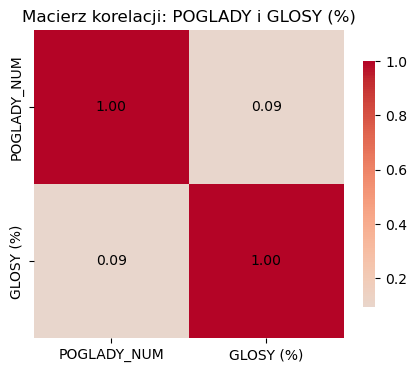

In [104]:
# Mapowanie 'POGLADY' na wartości numeryczne
poglady_map = {
    "Prawica": 4,
    "Centroprawica": 3,
    "Centrum": 2,
    "Centrolewica": 1,
    "Lewica": 0
}
df["POGLADY_NUM"] = df["POGLADY"].map(poglady_map)

# Konwersja 'GLOSY (%)' na numeryczne
df["GLOSY (%)"] = pd.to_numeric(df["GLOSY (%)"], errors='coerce')

# Wybór kolumn do korelacji
cols = ["POGLADY_NUM", "GLOSY (%)"]
corr_df = df[cols].dropna()

# Obliczenie macierzy korelacji
corr_matrix = corr_df.corr()

# Wizualizacja korelacji
plt.figure(figsize=(5,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    annot_kws={"color": "black"},
    cbar_kws={"shrink": 0.8}
)
plt.title("Macierz korelacji: POGLADY i GLOSY (%)")
plt.show()

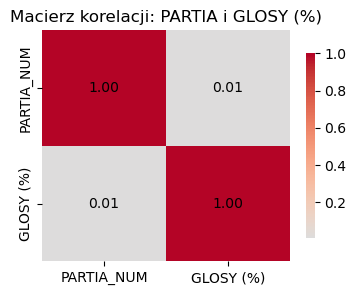

In [105]:
# Zamiana PARTIA na numeryczne kody
df["PARTIA_NUM"] = df["PARTIA"].astype('category').cat.codes

# Konwersja GLOSY (%) na liczby
df["GLOSY (%)"] = pd.to_numeric(df["GLOSY (%)"], errors='coerce')

# Wybieramy kolumny i usuwamy NaN
corr_df = df[["PARTIA_NUM", "GLOSY (%)"]].dropna()

# Obliczamy korelację
corr_matrix = corr_df.corr()

# Rysujemy heatmapę
plt.figure(figsize=(4,3))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    annot_kws={"color": "black"},
    cbar_kws={"shrink": 0.8}
)
plt.title("Macierz korelacji: PARTIA i GLOSY (%)")
plt.show()

### Nie widać zależności ani między poglądami a głosami, ani między partią a procentami głosów.

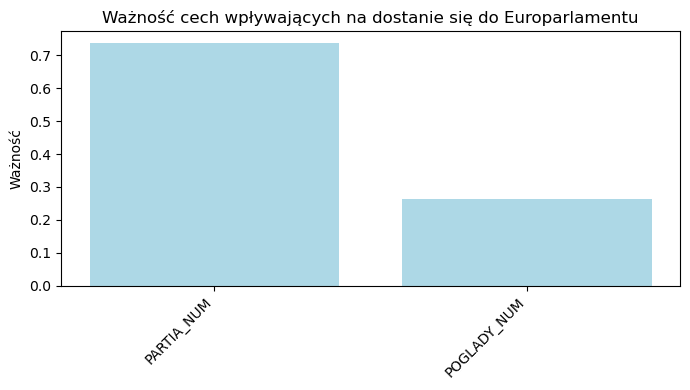

In [106]:
# Kodowanie POGLADY i PARTIA
le_poglady = LabelEncoder()
df['POGLADY_NUM'] = le_poglady.fit_transform(df['POGLADY'].astype(str))

le_partia = LabelEncoder()
df['PARTIA_NUM'] = le_partia.fit_transform(df['PARTIA'].astype(str))

# Tworzymy zmienną celu: 1 jeśli partia dostała się do Europarlamentu, 0 jeśli nie
df['MANDATY_TAK_NIE_NUM'] = df['MANDATY TAK NIE'].apply(lambda x: 1 if x == 'Tak' else 0)

# Wybieramy cechy i usuwamy wiersze z brakami
X = df[['POGLADY_NUM', 'PARTIA_NUM']].dropna()
y = df.loc[X.index, 'MANDATY_TAK_NIE_NUM']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trening drzewa decyzyjnego
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

# Ważność cech
importances = model_tree.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Wizualizacja ważności cech
plt.figure(figsize=(7,4))
plt.title("Ważność cech wpływających na dostanie się do Europarlamentu")
plt.bar(range(len(importances)), importances[indices], color='lightblue', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45, ha='right')
plt.ylabel("Ważność")
plt.tight_layout()
plt.show()

### Na wykresie widać, że najważniejszą cechą, dostania się do Europarlamentu jest przynależność do określonej partii politycznej.

In [ ]:
!jupyter nbconvert Europarlament_pl.ipynb --to html --no-input --no-prompt --output Europarlament.html > null 2>&1